In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [5]:
chicago_data = pd.read_csv("/content/Crimes.csv")

In [6]:
print(chicago_data.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


In [7]:
chicago_data.sample(6)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
8347,12955171,JG119563,01-12-2023 17:06,009XX N MICHIGAN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.624142,"(41.899734047, -87.624142375)",22.0,21182.0,37.0,233.0,11.0,6.0,14.0,71.0
2140,12944020,JG106442,01-03-2023 16:20,047XX W WEST END AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,-87.743561,"(41.883148173, -87.743560636)",11.0,22216.0,26.0,696.0,23.0,32.0,16.0,90.0
5656,12946182,JG108962,01-08-2023 18:10,037XX W WABANSIA AVE,033A,ROBBERY,ATTEMPT ARMED - HANDGUN,SIDEWALK,False,False,...,-87.719486,"(41.911784395, -87.719486479)",10.0,22535.0,24.0,391.0,49.0,1.0,6.0,193.0
19185,12966443,JG132823,01/28/2023 03:07:00 PM,012XX W 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,...,-87.653642,"(41.735931109, -87.653642482)",18.0,21554.0,70.0,531.0,13.0,59.0,20.0,233.0
16822,12966312,JG132777,01/24/2023 07:30:00 PM,005XX W 74TH ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,-87.638762,"(41.759830103, -87.63876244)",17.0,21559.0,66.0,511.0,32.0,11.0,17.0,214.0
21958,12970856,JG138347,02-02-2023 08:30,047XX S KOSTNER AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,-87.733357,"(41.80715874, -87.733357032)",35.0,22248.0,54.0,697.0,8.0,56.0,13.0,105.0


**I. DATA CLEANING**

**(i)Finding missing values**

In [8]:
print(chicago_data.info())
# Find missing values
missing_values = chicago_data.isnull()

# Count missing values in each column
missing_values_count = missing_values.sum()

# Calculate percentage of missing values in each column
missing_values_percentage = (missing_values_count / chicago_data.shape[0]) * 100

# Print the results
print("Missing values count:")
print(missing_values_count)

print("\nMissing values percentage:")
print(missing_values_percentage)

chicago_data.dropna(inplace=True)

print("\nDataset after removing the missing values")
print(chicago_data)
print(chicago_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23827 entries, 0 to 23826
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          23827 non-null  int64  
 1   Case Number                 23827 non-null  object 
 2   Date                        23827 non-null  object 
 3   Block                       23827 non-null  object 
 4   IUCR                        23827 non-null  object 
 5   Primary Type                23827 non-null  object 
 6   Description                 23827 non-null  object 
 7   Location Description        23670 non-null  object 
 8   Arrest                      23826 non-null  object 
 9   Domestic                    23826 non-null  object 
 10  Beat                        23826 non-null  float64
 11  District                    23826 non-null  float64
 12  Ward                        23826 non-null  float64
 13  Community Area              238

**(ii)Descriptive statistics**

In [9]:
chicago_data.describe(include='all')
chicago_data.describe(percentiles=[0.1, 0.2, 0.3])



,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,2.345600e+04,23456.000000,23456.000000,23456.000000,23456.000000,2.345600e+04,2.345600e+04,23456.0,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000,23456.000000
mean,1.293391e+07,1139.957324,11.170404,23.051074,36.707623,1.165628e+06,1.886296e+06,2023.0,41.843571,-87.667714,27.801074,18976.291866,38.023533,377.034789,26.220498,31.994117,14.834371,147.788029
std,5.911704e+05,709.727603,7.093311,14.105439,21.411539,1.654184e+04,3.187126e+04,0.0,0.087650,0.060217,15.234700,5810.874797,20.011701,231.286887,14.244219,19.026050,6.450003,79.053926
min,2.727900e+04,111.000000,1.000000,1.000000,1.000000,1.100255e+06,1.813897e+06,2023.0,41.644590,-87.906491,1.000000,4299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,1.294268e+07,234.000000,2.000000,5.000000,8.000000,1.143572e+06,1.845353e+06,2023.0,41.730802,-87.748111,7.000000,4451.000000,10.000000,63.000000,6.000000,6.000000,5.000000,35.000000
20%,1.294643e+07,423.000000,4.000000,8.000000,19.000000,1.151008e+06,1.854482e+06,2023.0,41.756059,-87.720944,11.000000,14924.000000,22.000000,133.000000,10.000000,13.000000,9.000000,70.000000
30%,1.295030e+07,624.000000,6.000000,12.000000,24.000000,1.156719e+06,1.862607e+06,2023.0,41.778661,-87.700591,17.000000,21190.000000,26.000000,207.000000,15.000000,19.000000,12.000000,92.000000
50%,1.295760e+07,1024.000000,10.000000,23.000000,32.000000,1.167484e+06,1.892216e+06,2023.0,41.859977,-87.660565,29.000000,21559.000000,37.000000,379.000000,28.000000,30.000000,15.000000,148.000000
max,1.334769e+07,2535.000000,31.000000,50.000000,77.000000,1.205114e+06,1.951493e+06,2023.0,42.022537,-87.524652,53.000000,26912.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000


**(iii) Outlier Detection**

In [10]:
import pandas as pd
from scipy import stats

def handle_numerical_columns(data):
  """
  Analyzes and cleans numerical columns in a DataFrame, excluding the date column.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed for numerical columns (excluding date).
      int: The number of outliers removed.
      int: The number of rows removed (if any).
  """

  # Identify numerical columns (exclude date if it's a datetime type)
  numerical_cols = data.select_dtypes(include=[np.number]).columns
  if pd.api.types.is_datetime64_dtype(data['Date']):  # Check if 'date' is datetime
    numerical_cols = numerical_cols.drop('Date')  # Exclude 'date' from numerical columns

  # Analyze and clean each numerical column (excluding date)
  outliers_removed = 0
  rows_removed = 0
  for col in numerical_cols:
    # Calculate skewness and kurtosis
    skew = stats.skew(data[col])
    kurt = stats.kurtosis(data[col])
    print(f"Column: {col}\n Skewness: {skew:.4f}\n Kurtosis: {kurt:.4f}")

    # Identify and remove outliers (replace with IQR method)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    outliers_removed += len(data) - len(filtered_data)
    rows_removed = len(data) - len(filtered_data)
    data = filtered_data.copy()  # Update data with outliers removed

  return data, outliers_removed, rows_removed

# Assuming chicago_data is your DataFrame
cleaned_data, num_outliers_removed, num_rows_removed = handle_numerical_columns(chicago_data.copy())

print(f"\nOutliers removed: {num_outliers_removed}")
if num_rows_removed > 0:
  print(f"Rows removed: {num_rows_removed}")
else:
  print("No rows were removed.")

# Further analysis or use of the cleaned data can be done here


print(chicago_data.columns)

Column: ID
 Skewness: -21.7393
 Kurtosis: 471.6527
Column: Beat
 Skewness: 0.3975
 Kurtosis: -0.9535
Column: District
 Skewness: 0.3998
 Kurtosis: -0.9495
Column: Ward
 Skewness: 0.1730
 Kurtosis: -1.1364
Column: Community Area
 Skewness: 0.2135
 Kurtosis: -1.0089
Column: X Coordinate
 Skewness: -0.4100
 Kurtosis: 0.2993
Column: Y Coordinate
 Skewness: -0.0542
 Kurtosis: -0.9734
Column: Year
 Skewness: nan
 Kurtosis: nan
Column: Latitude
 Skewness: -0.0550
 Kurtosis: -0.9757
Column: Longitude
 Skewness: -0.1982
 Kurtosis: -0.4417
Column: Historical Wards 2003-2015
 Skewness: -0.0492
 Kurtosis: -1.2155
Column: Zip Codes
 Skewness: -1.8403
 Kurtosis: 1.8786
Column: Community Areas
 Skewness: 0.1985
 Kurtosis: -1.0478
Column: Census Tracts
 Skewness: 0.0113
 Kurtosis: -1.1014
Column: Wards
 Skewness: -0.1030
 Kurtosis: -1.2212
Column: Boundaries - ZIP Codes
 Skewness: 0.2177
 Kurtosis: -1.3599
Column: Police Districts
 Skewness: -0.3900
 Kurtosis: -0.7056
Column: Police Beats
 Skewness: -

In [11]:
import pandas as pd
from sklearn.covariance import MinCovDet  # Alternative covariance estimator

def handle_outliers_mahalanobis(data):
  """
  Detects and removes outliers using Mahalanobis distance for numerical columns.

  Modifies the input DataFrame in-place.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      list: A list of column names that were removed due to high multicollinearity.
  """

  # Identify numerical columns
  numerical_cols = data.select_dtypes(include=[np.number])

  # Track removed columns due to multicollinearity
  removed_cols = []

  # Mahalanobis outlier detection for each numerical column

  xxx =len(chicago_data)
  for col in numerical_cols:
    try:
      # Estimate covariance matrix using MinCovDet (alternative)
      cov = MinCovDet().fit(data[[col]])
      # Mahalanobis distance calculation
      mahalanobis_dist = cov.mahalanobis(data[[col]])

      # Threshold for outlier detection (adjust based on your data and analysis)
      threshold = 3.5  # You can adjust this threshold

      # Identify and remove outliers based on Mahalanobis distance
      data = data[mahalanobis_dist < threshold]
      data = data.reset_index(drop=True)  # Reset index after filtering

      # Check for multicollinearity (optional)
      # You can choose a different multicollinearity detection method
      correlation = data.corr()
      correlation_threshold = 0.9  # Adjust threshold as needed
      collinear_pairs = []
      for i in range(len(correlation)):
        for j in range(i + 1, len(correlation)):
          if correlation.iloc[i, j] >= correlation_threshold and correlation.iloc[i, j] != 1:
            collinear_pairs.append((correlation.index[i], correlation.index[j]))
      if collinear_pairs:
        # Remove a column from each highly correlated pair (consider alternative strategies)
        for pair in collinear_pairs:
          removed_cols.append(pair[0])
          data = data.drop(pair[0], axis=1)

    except:
      # Handle potential errors (e.g., singular matrix for covariance estimation)
      removed_cols.append(col)
      print(f"Warning: Removed column {col} due to covariance estimation error.")

  return removed_cols

# Assuming chicago_crime_data is your DataFrame
removed_cols_multicollinearity = handle_outliers_mahalanobis(chicago_data)

# Print information about removed data
if removed_cols_multicollinearity:
  print(f"Removed columns due to multicollinearity: {removed_cols_multicollinearity}")
# num_rows_removed = xxx - len(chicago_data)
# if num_rows_removed > 0:
#   print(f"Rows removed due to outlier detection: {num_rows_removed}")
# else:
#   print("No rows were removed due to outlier detection.")

# chicago_crime_data is now modified with outliers and multicollinearity removed
print(chicago_data.columns)


Removed columns due to multicollinearity: ['ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats']
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


**(iv) Feature Extraction**

In [12]:
# Feature extraction incorporating 'Zip Codes' column
# You can customize this based on your dataset and requirements

# Create a new feature indicating whether the ZIP code matches with 'Boundaries-ZIP Codes'
chicago_data['zip_match'] = (chicago_data['Boundaries - ZIP Codes'] == chicago_data['Zip Codes'])

# Display the modified DataFrame with new features
print("Modified DataFrame with new features including 'zip_match':")
print(chicago_data.head())
print(chicago_data.columns)

Modified DataFrame with new features including 'zip_match':
         ID Case Number              Date                 Block  IUCR  \
0  13140855    JG341458  01-01-2023 00:00  082XX S JEFFERY BLVD  1754   
1  12938772    JG100243  01-01-2023 00:00   073XX S ABERDEEN ST  0266   
2  12976707    JG145183  01-01-2023 00:00      004XX W 110TH PL  1754   
3  13222722    JG438814  01-01-2023 00:00   052XX N SHERIDAN RD  0810   
4  13223672    JG439926  01-01-2023 00:00        003XX N MAY ST  1140   

                 Primary Type  \
0  OFFENSE INVOLVING CHILDREN   
1     CRIMINAL SEXUAL ASSAULT   
2  OFFENSE INVOLVING CHILDREN   
3                       THEFT   
4          DECEPTIVE PRACTICE   

                                         Description Location Description  \
0  AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...            APARTMENT   
1                                          PREDATORY            RESIDENCE   
2  AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...            RESIDEN

***FEATURE SUBSET SELECTION***

**Filtering**

In [13]:
# Select only numerical columns (excluding the target variable if applicable)
numerical_data = chicago_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation = numerical_data.corr()

# Set a threshold for high correlation (e.g., 0.8)
correlation_threshold = 0.8

# Identify highly correlated features (exclude 'date' and 'IUCR')
highly_correlated = set()
date_col = 'Date'
iucr_col = 'IUCR'  # Assuming 'IUCR' is the column name (adjust if different)
numerical_cols_without_date_iucr = numerical_data.columns.difference([date_col, iucr_col])
for i in range(len(correlation)):
  col1 = correlation.index[i]
  if col1 == date_col or col1 == iucr_col:  # Skip 'date' and 'IUCR' columns for comparison
    continue
  for j in range(i + 1, len(correlation)):
    col2 = correlation.index[j]
    if col2 == date_col or col2 == iucr_col:  # Skip 'date' and 'IUCR' columns for comparison
      continue
    if correlation.iloc[i, j] >= correlation_threshold and correlation.iloc[i, j] != 1:
      # Remove the feature with lower variance (assuming it provides less information)
      if numerical_data[col1].var() < numerical_data[col2].var():
        highly_correlated.add(col1)
      else:
        highly_correlated.add(col2)

# Removed columns due to high correlation:
removed_columns_filtering = list(highly_correlated)
print(f"Removed columns (filtering): {removed_columns_filtering}")
print("Reason for removal: High correlation (above threshold) with another feature, potentially redundant.")

# Filtered numerical data (excluding highly correlated features and preserving 'date' and 'IUCR')
filtered_numerical_data = numerical_data.drop(columns=removed_columns_filtering)
chicago_data = pd.concat([chicago_data[[date_col, iucr_col]], filtered_numerical_data], axis=1)
print(chicago_data.columns)


Removed columns (filtering): ['Latitude', 'District', 'Longitude']
Reason for removal: High correlation (above threshold) with another feature, potentially redundant.
Index(['Date', 'IUCR', 'ID', 'Beat', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


**This code selects only numerical columns from your DataFrame.**

It calculates the correlation matrix for these columns.
A threshold is set to identify features with very high correlation (e.g., 0.8).
Highly correlated features are identified, and the one with lower variance is removed (assuming it contributes less information).
The removed columns and the reason for removal (high correlation) are printed.
Finally, a new DataFrame (filtered_data_filtering) excludes the highly correlated features.

***DATA VISUALIZATION***

**(i)Scatter Plot**

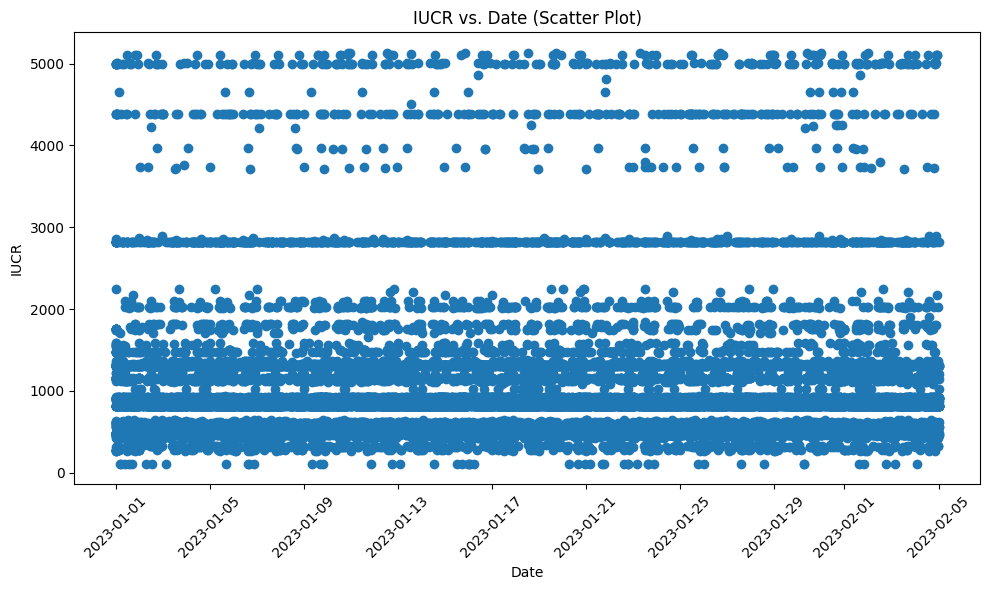

Index(['Date', 'IUCR', 'ID', 'Beat', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


In [14]:
import matplotlib.pyplot as plt


# Assuming 'Date' and 'IUCR' are your column names (adjust if different)
date_col = 'Date'
iucr_col = 'IUCR'
chicago_data['Date'] = pd.to_datetime(chicago_data['Date'], format='mixed')


# Convert 'IUCR' column to numeric, coerce errors
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

# Check data types (optional, ensure they are numerical for histogram)
if not pd.api.types.is_numeric_dtype(chicago_data[iucr_col]):
  print(f"Warning: '{iucr_col}' column might not be numerical for histogram.")

# Create the histogram (using 'date' on y-axis)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(chicago_data[date_col].dt.to_pydatetime(), chicago_data[iucr_col])  # Dates on x-axis, IUCR on y-axis
plt.xlabel('Date')
plt.ylabel('IUCR')
plt.title('IUCR vs. Date (Scatter Plot)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many categories
plt.tight_layout()
plt.show()

print(chicago_data.columns)

**(ii)Box Plot**

<Figure size 1000x600 with 0 Axes>

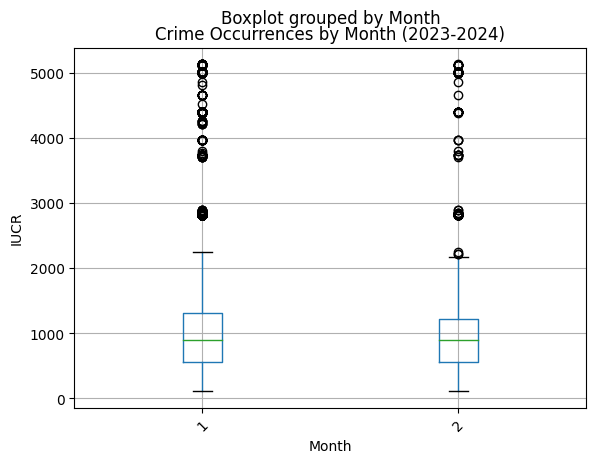

In [15]:


# Convert 'Date' column to datetime format
chicago_data['Date'] = pd.to_datetime(chicago_data['Date'])

# Convert 'IUCR' column to numeric, coerce errors
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

# Drop rows with NaN values in the 'IUCR' column
chicago_data = chicago_data.dropna(subset=['IUCR'])

# Filter data for the years 2023 to 2024
filtered_data = chicago_data[(chicago_data['Date'].dt.year >= 2023) & (chicago_data['Date'].dt.year <= 2024)]

# Extract months from the 'Date' column
filtered_data['Month'] = filtered_data['Date'].dt.month

plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='IUCR', by='Month')
plt.title('Crime Occurrences by Month (2023-2024)')
plt.xlabel('Month')
plt.ylabel('IUCR')
plt.xticks(rotation=45)
plt.show()


**(iii) Quartiles**

In [16]:


# Convert 'Occurrences' column to numeric
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

quartiles = chicago_data['IUCR'].quantile([0.25, 0.5, 0.75])
print("Quartiles of Crime Occurrences:")
print(quartiles)

Quartiles of Crime Occurrences:
0.25     560.0
0.50     890.0
0.75    1310.0
Name: IUCR, dtype: float64


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the Chicago crime data
# Assuming chicago_data is already loaded

# Extract numerical columns for modeling
numerical_data = chicago_data.select_dtypes(include=['int', 'float'])

# Define the target variable
target_variable = 'IUCR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_data, chicago_data[target_variable], test_size=0.2, random_state=42)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train)

# Evaluate the model's performance on the training data
train_score = model.score(X_train_imputed, y_train)
print("Training R^2 score:", train_score)

# Define the dates to predict
dates_to_predict = ['2024-02-29']  # Assuming February has 29 days in 2024
predicted_values = []

# Iterate over each date and make predictions
for date in dates_to_predict:
    # Create a new row with missing values for the date to predict
    features_to_predict = X_train.iloc[0].copy()  # Take any row as template
    features_to_predict.name = pd.to_datetime(date)
    features_to_predict[:] = pd.NA

    # Impute missing values in the features
    features_to_predict_imputed = imputer.transform([features_to_predict])

    # Predict using the trained model
    prediction = model.predict(features_to_predict_imputed)[0]
    predicted_values.append(prediction)

# Display the predicted values
predicted_data = pd.DataFrame({'Date': dates_to_predict, 'Predicted IUCR': predicted_values})
print(predicted_data)


Training R^2 score: 0.9999996493936275
         Date  Predicted IUCR
0  2024-02-29          1089.1


In [18]:
print(chicago_data['Date'])


0       2023-01-01 00:00:00
1       2023-01-01 00:00:00
2       2023-01-01 00:00:00
3       2023-01-01 00:00:00
4       2023-01-01 00:00:00
                ...        
23821   2023-02-05 00:01:00
23822   2023-02-05 00:05:00
23823   2023-02-05 00:15:00
23824   2023-02-05 00:16:00
23825   2023-02-05 00:19:00
Name: Date, Length: 21664, dtype: datetime64[ns]
